# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

# list of city data
city_data = []

# create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
        # reset the group every 50 counts of cities
        set_count += 1
        record_count = 1
        
    # create the endpoint url for each city
    city_url = f"{url}&q={city}"
    
    # log the record and the set number
    print(f"Processing city #{record_count} in group #{set_count} | {city}")
    record_count += 1
    
    try:
        # run API requests and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # add a time delay to avoid blowing out the API key
        time.sleep(2)
        
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        # if an error occurs when making the API call, skip the city
        print(f"{city} has an error. Skipping...")
        pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing city #1 in group #1 | atuona
Processing city #2 in group #1 | souillac
Processing city #3 in group #1 | tuktoyaktuk
Processing city #4 in group #1 | zhob
Processing city #5 in group #1 | mahebourg
Processing city #6 in group #1 | vaitupu
vaitupu has an error. Skipping...
Processing city #7 in group #1 | marcona
marcona has an error. Skipping...
Processing city #8 in group #1 | dunedin
Processing city #9 in group #1 | cape town
Processing city #10 in group #1 | busselton
Processing city #11 in group #1 | fuerte olimpo
Processing city #12 in group #1 | punta arenas
Processing city #13 in group #1 | cidreira
Processing city #14 in group #1 | laguna
Processing city #15 in group #1 | provideniya
Processing city #16 in group #1 | rikitea
Processing city #17 in group #1 | vao
Processing city #18 in group #1 | utiroa
utiroa has an error. Skipping...
Processing city #19 in group #1 | hermanus
Processing city #20 in group #1 

Processing city #27 in group #4 | korsakovo
Processing city #28 in group #4 | santo estevao
Processing city #29 in group #4 | penzance
Processing city #30 in group #4 | cabo san lucas
Processing city #31 in group #4 | santa cruz
Processing city #32 in group #4 | gangoh
Processing city #33 in group #4 | moerai
Processing city #34 in group #4 | mar del plata
Processing city #35 in group #4 | okhotsk
Processing city #36 in group #4 | fano
Processing city #37 in group #4 | havoysund
Processing city #38 in group #4 | solenzo
Processing city #39 in group #4 | hokitika
Processing city #40 in group #4 | bajo baudo
bajo baudo has an error. Skipping...
Processing city #41 in group #4 | ranong
Processing city #42 in group #4 | illoqqortoormiut
illoqqortoormiut has an error. Skipping...
Processing city #43 in group #4 | alta floresta
Processing city #44 in group #4 | grand gaube
Processing city #45 in group #4 | lakselv
Processing city #46 in group #4 | aklavik
Processing city #47 in group #4 | bo

Processing city #6 in group #8 | deputatskiy
Processing city #7 in group #8 | okmulgee
Processing city #8 in group #8 | grand forks
Processing city #9 in group #8 | rosetta
Processing city #10 in group #8 | praia da vitoria
Processing city #11 in group #8 | cananeia
Processing city #12 in group #8 | eureka
Processing city #13 in group #8 | diamantino
Processing city #14 in group #8 | tamworth
Processing city #15 in group #8 | sambava
Processing city #16 in group #8 | tessalit
Processing city #17 in group #8 | mwinilunga
Processing city #18 in group #8 | nouakchott
Processing city #19 in group #8 | honningsvag
Processing city #20 in group #8 | isangel
Processing city #21 in group #8 | poum
Processing city #22 in group #8 | saleaula
saleaula has an error. Skipping...
Processing city #23 in group #8 | altamira
Processing city #24 in group #8 | lourdes
Processing city #25 in group #8 | kayerkan
Processing city #26 in group #8 | strai
Processing city #27 in group #8 | bathsheba
Processing c

Processing city #32 in group #11 | martapura
Processing city #33 in group #11 | alvand
Processing city #34 in group #11 | gongzhuling
Processing city #35 in group #11 | mount isa
Processing city #36 in group #11 | ancud
Processing city #37 in group #11 | tokomaru
Processing city #38 in group #11 | istisu
Processing city #39 in group #11 | high rock
Processing city #40 in group #11 | madang
Processing city #41 in group #11 | mayumba
Processing city #42 in group #11 | letlhakane
Processing city #43 in group #11 | bid
bid has an error. Skipping...
Processing city #44 in group #11 | petropavlovka
Processing city #45 in group #11 | aguimes
Processing city #46 in group #11 | bardiyah
Processing city #47 in group #11 | port-gentil
Processing city #48 in group #11 | moroni
Processing city #49 in group #11 | balaipungut
Processing city #50 in group #11 | clyde river
Processing city #1 in group #12 | the valley
Processing city #2 in group #12 | haapiti
Processing city #3 in group #12 | antanifot

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,78.13,78,15,18.10,PF,1635042357
1,souillac,-20.5167,57.5167,75.36,83,40,11.50,MU,1635042406
2,tuktoyaktuk,69.4541,-133.0374,30.20,86,90,4.61,CA,1635042408
3,zhob,31.3411,69.4481,54.82,60,0,4.45,PK,1635042411
4,mahebourg,-20.4081,57.7000,75.25,83,40,11.50,MU,1635042413


In [7]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,19.668194,19.972529,60.332165,72.211268,55.316901,7.681532,1.635043e+09
std,32.731944,88.549703,20.224077,19.806144,39.370867,5.474146,4.197468e+02
min,-54.800000,-179.166700,-8.930000,15.000000,0.000000,0.000000,1.635042e+09
25%,-5.289700,-56.103300,46.077500,62.000000,14.750000,3.352500,1.635043e+09
50%,22.426100,25.328300,64.245000,76.000000,67.000000,6.730000,1.635043e+09
75%,47.674125,95.519150,76.970000,87.000000,97.000000,11.230000,1.635043e+09
max,78.218600,179.316700,96.570000,100.000000,100.000000,32.260000,1.635044e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
print(dirty_city_data)

Int64Index([], dtype='int64')


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,78.13,78,15,18.10,PF,1635042357
1,souillac,-20.5167,57.5167,75.36,83,40,11.50,MU,1635042406
2,tuktoyaktuk,69.4541,-133.0374,30.20,86,90,4.61,CA,1635042408
3,zhob,31.3411,69.4481,54.82,60,0,4.45,PK,1635042411
4,mahebourg,-20.4081,57.7000,75.25,83,40,11.50,MU,1635042413


In [10]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

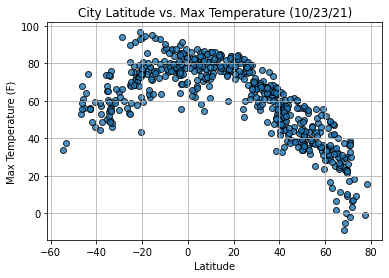

In [11]:
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

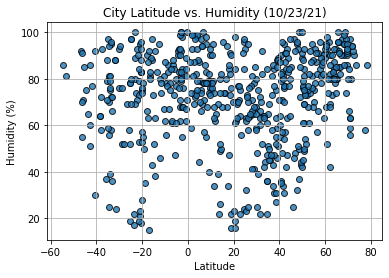

In [12]:
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

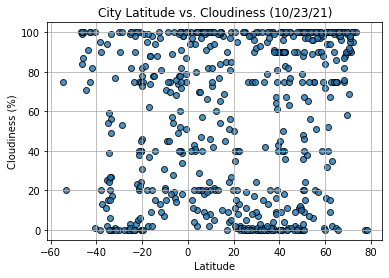

In [13]:
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

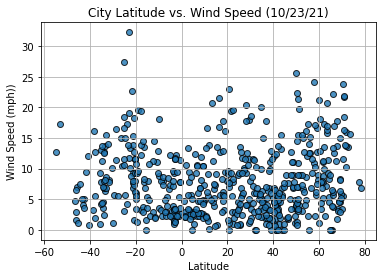

In [14]:
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph))")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # run a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.791610150685846


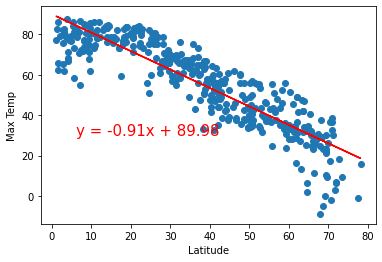

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4495842533344956


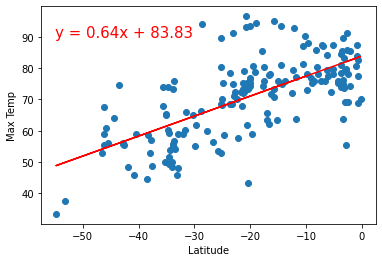

In [21]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-55,90))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.034382485176841594


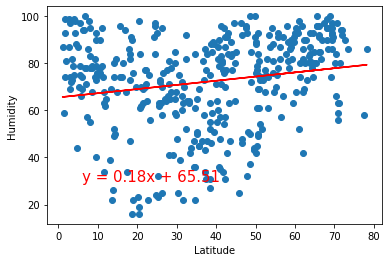

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(6,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.018213870182921005


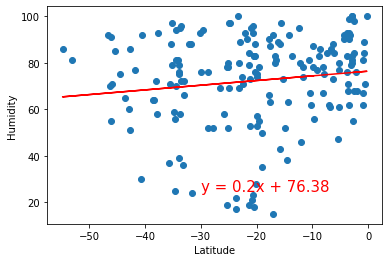

In [30]:
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(-30,25))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04193794117500808


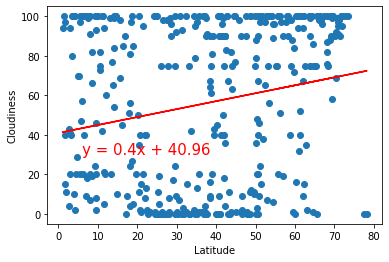

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01662809233217228


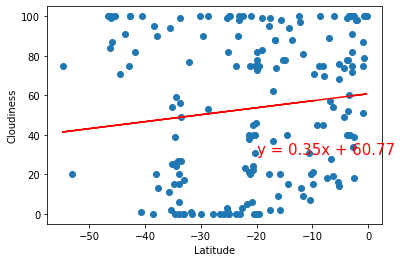

In [33]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness',(-20,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.055932053698416744


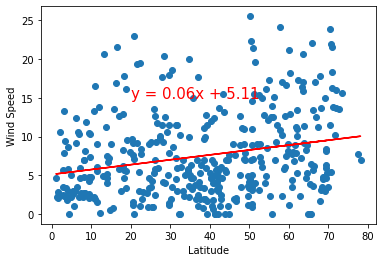

In [37]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(20,15))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.024299684058022342


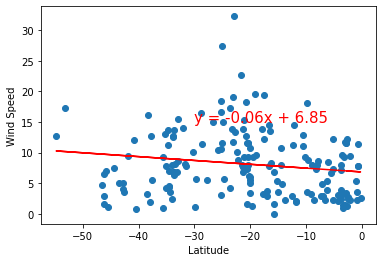

In [38]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed',(-30,15))